In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("glass_data.xlsx", sheet_name="glass")

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
print(df.shape)
print("\n--- Dataset Info ---")
print(df.info())

(214, 10)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [ ]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
# Remove duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print(f"✅ Removed {before - after} duplicate row(s).")
print("New dataset shape:", df.shape)


✅ Removed 1 duplicate row(s).
New dataset shape: (213, 10)


In [ ]:
df[df.duplicated()]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [ ]:
print("\n--- Summary Statistics ---")
print(df.describe().T)


--- Summary Statistics ---
      count       mean       std       min       25%       50%       75%  \
RI    213.0   1.518348  0.003033   1.51115   1.51652   1.51768   1.51915   
Na    213.0  13.404085  0.816662  10.73000  12.90000  13.30000  13.81000   
Mg    213.0   2.679202  1.443691   0.00000   2.09000   3.48000   3.60000   
Al    213.0   1.449484  0.495925   0.29000   1.19000   1.36000   1.63000   
Si    213.0  72.655070  0.773998  69.81000  72.28000  72.79000  73.09000   
K     213.0   0.498873  0.653185   0.00000   0.13000   0.56000   0.61000   
Ca    213.0   8.954085  1.425882   5.43000   8.24000   8.60000   9.15000   
Ba    213.0   0.175869  0.498245   0.00000   0.00000   0.00000   0.00000   
Fe    213.0   0.057277  0.097589   0.00000   0.00000   0.00000   0.10000   
Type  213.0   2.788732  2.105130   1.00000   1.00000   2.00000   3.00000   

           max  
RI     1.53393  
Na    17.38000  
Mg     4.49000  
Al     3.50000  
Si    75.41000  
K      6.21000  
Ca    16.19000  

In [ ]:
possible_targets = [c for c in df.columns if c.lower() in ['type', 'glass_type', 'glass type']]
target_col = possible_targets[0] if len(possible_targets) > 0 else df.columns[-1]
print(f"\n🎯 Target column detected: {target_col}")


🎯 Target column detected: Type


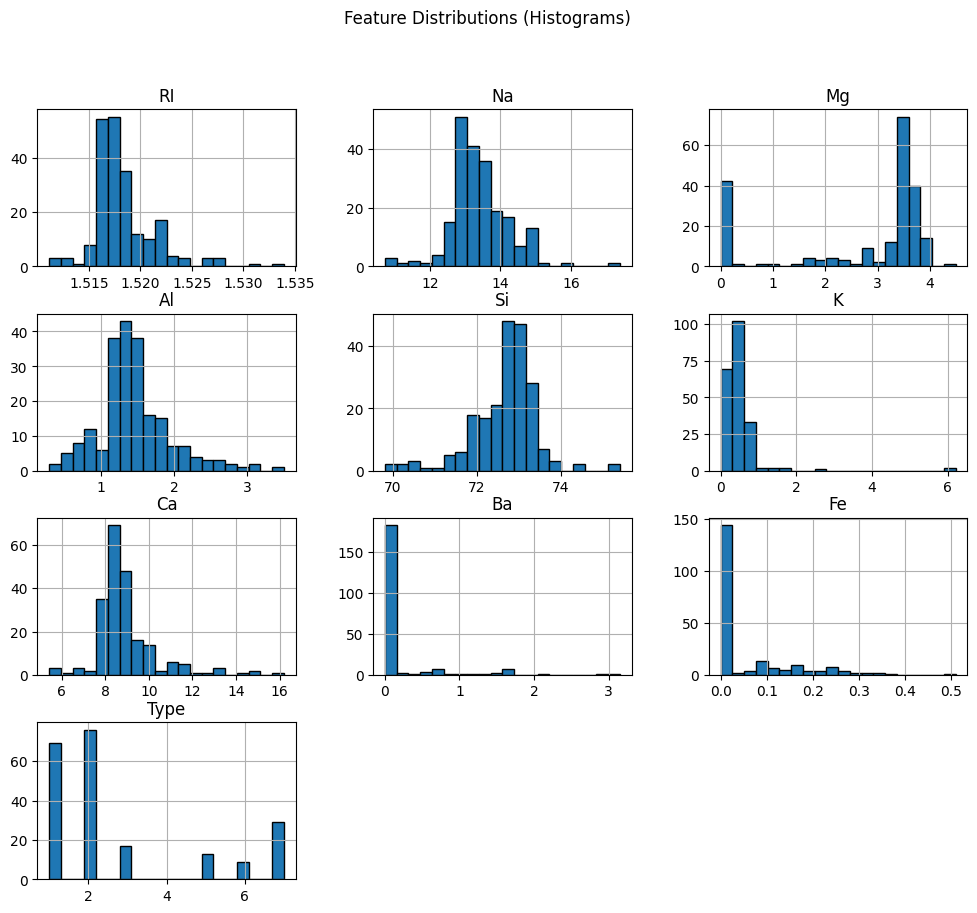

In [ ]:
# Histograms (distribution of each numeric column)
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)")
plt.show()


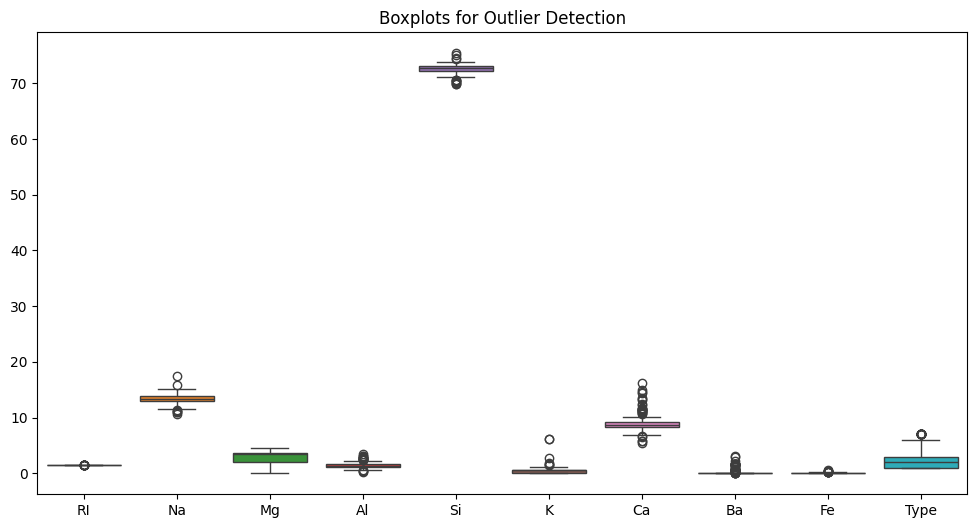

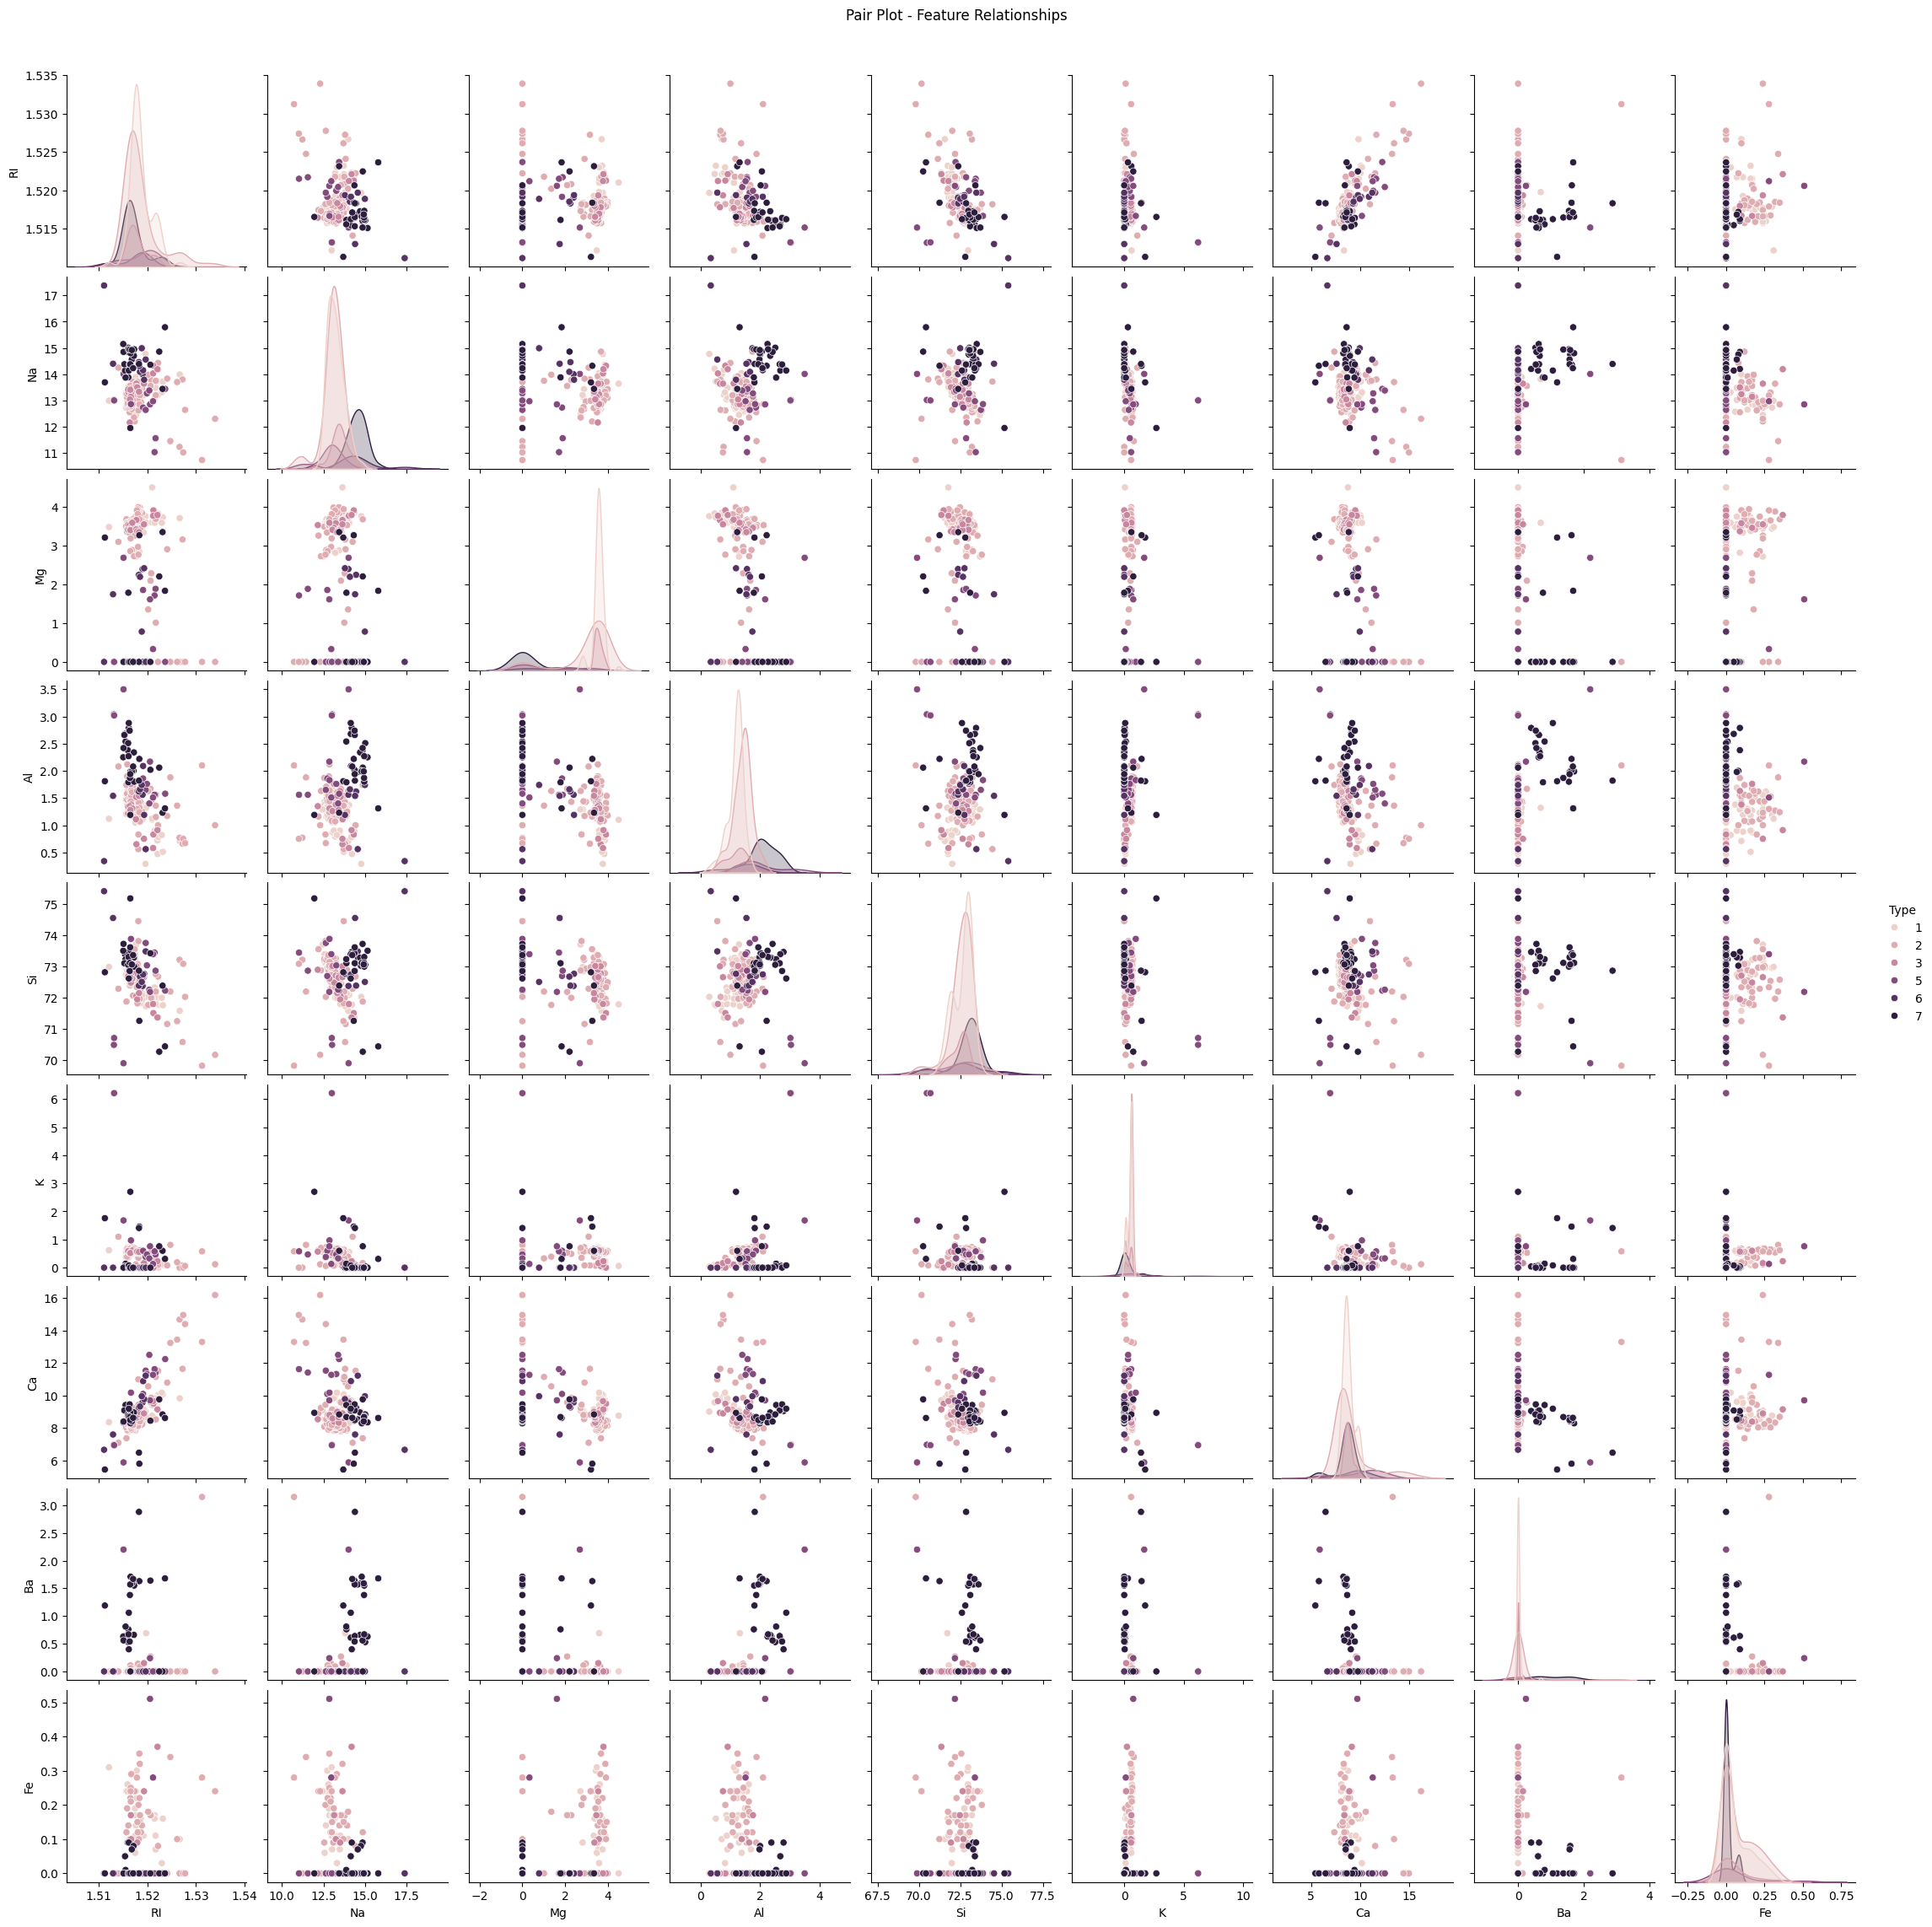

In [ ]:
# Pair plot (relationships between features)
sns.pairplot(df, hue=target_col)
plt.suptitle("Pair Plot - Feature Relationships", y=1.02)
plt.show()

In [ ]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


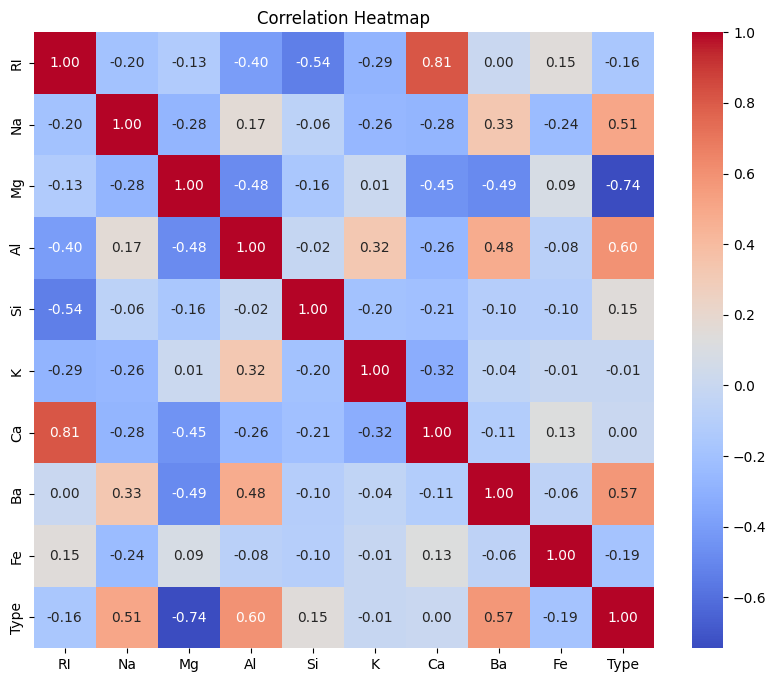

In [ ]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']
print("✅ Feature matrix shape:", X.shape)
print("✅ Target vector shape:", y.shape)


✅ Feature matrix shape: (213, 9)
✅ Target vector shape: (213,)


Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


/tmp/ipython-input-3515624079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


Text(0.5, 1.0, 'Class Distribution (Glass Types)')

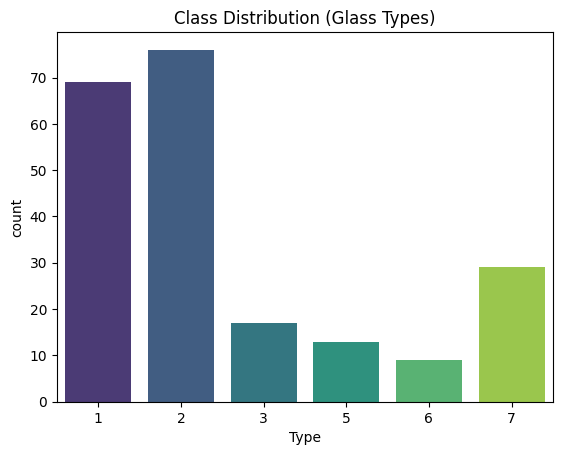

In [ ]:
print(y.value_counts())
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution (Glass Types)")


In [ ]:
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())


Missing values in X: 0
Missing values in y: 0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE:", Counter(y))
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)
print("After SMOTE:", Counter(y_res))


Before SMOTE: Counter({2: 76, 1: 69, 7: 29, 3: 17, 5: 13, 6: 9})
After SMOTE: Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
rf_model = RandomForestClassifier( n_estimators=100, criterion='gini', random_state=42 ,class_weight='balanced')

In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("🎯 Random Forest Model Performance:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

🎯 Random Forest Model Performance:
Accuracy  : 0.9239
Precision : 0.9252
Recall    : 0.9239
F1 Score  : 0.9242

--- Classification Report ---
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.93      0.87      0.90        15
           3       0.93      0.93      0.93        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.93      0.92      0.92        92



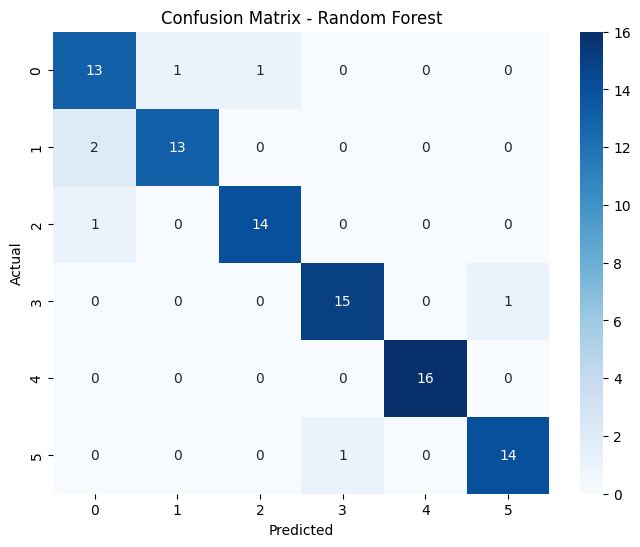

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

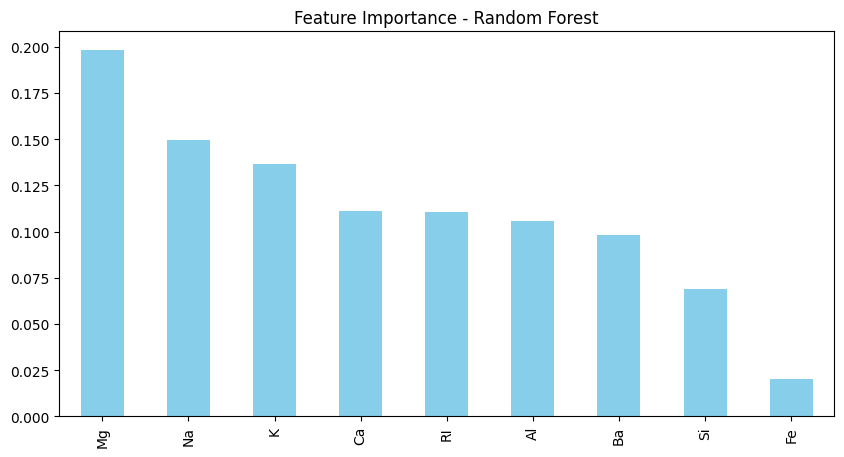

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# --- Bagging ---
bag_model = BaggingClassifier(
    estimator=RandomForestClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

# --- Boosting (AdaBoost) ---
boost_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
boost_model.fit(X_train, y_train)
y_pred_boost = boost_model.predict(X_test)

# --- Gradient Boosting ---
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# --- Compare Results ---
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{name} Performance:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

evaluate_model("Bagging", y_test, y_pred_bag)
evaluate_model("AdaBoost", y_test, y_pred_boost)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)



Bagging Performance:
Accuracy : 0.9239
Precision: 0.9267
Recall   : 0.9239
F1 Score : 0.9237

AdaBoost Performance:
Accuracy : 0.3261
Precision: 0.3080
Recall   : 0.3261
F1 Score : 0.3004

Gradient Boosting Performance:
Accuracy : 0.8913
Precision: 0.8997
Recall   : 0.8913
F1 Score : 0.8924


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
